# Goal:
Using Random Forest to estimate the gini index and feature importance for all features from CA dataset

Using Scikit-learn to compute PCA

## Mount Google drive

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# 1.Load data - Combined CA Data

In [206]:
CA_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_labeledData_Oct11.csv',low_memory=False)
print(CA_labeled_data.shape)

(9196, 19)


In [207]:
CA_labeled_data.dtypes

Date                        object
fips_x                       int64
County Name                 object
population                   int64
retail and recreation      float64
grocery and pharmacy       float64
parks                      float64
transit stations           float64
workplaces                 float64
residential                float64
driving                    float64
m50                        float64
m50_index                    int64
population_density         float64
mask_rule_active             int64
mask_wearing_percent       float64
New cases                    int64
New Cases/1k population    float64
growth_label                object
dtype: object

## Preprocessing data 

* drop na
* convert categorical code

In [208]:
CA_labeled_data['growth_code'] = CA_labeled_data['growth_label'].astype('category').cat.codes

CA_labeled_data.head(2)

,Date,fips_x,County Name,population,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,New Cases/1k population,growth_label,growth_code
0,2020-03-01,6001,Alameda County,1671329,6.0,9.0,15.0,1.0,4.0,0.0,-7.65,3.684,58,2261.547725,0,0.0,0,0.0,flat_growth,2
1,2020-03-02,6001,Alameda County,1671329,4.0,7.0,7.0,-1.0,3.0,0.0,6.76,6.182,98,2261.547725,0,0.0,0,0.0,flat_growth,2


In [209]:
CA_labeled_data = CA_labeled_data.dropna()

In [210]:
#CA_labeled_data[pd.isna(CA_labeled_data['growth_label'])]

In [211]:
#CA_labeled_data['label_code'].unique()

In [212]:
CA_labeled_data['growth_code'] = CA_labeled_data['growth_label'].astype('category').cat.codes
CA_labeled_data.head()

,Date,fips_x,County Name,population,retail and recreation,grocery and pharmacy,parks,transit stations,workplaces,residential,driving,m50,m50_index,population_density,mask_rule_active,mask_wearing_percent,New cases,New Cases/1k population,growth_label,growth_code
0,2020-03-01,6001,Alameda County,1671329,6.0,9.0,15.0,1.0,4.0,0.0,-7.65,3.684,58,2261.547725,0,0.0,0,0.000000,flat_growth,2
1,2020-03-02,6001,Alameda County,1671329,4.0,7.0,7.0,-1.0,3.0,0.0,6.76,6.182,98,2261.547725,0,0.0,0,0.000000,flat_growth,2
2,2020-03-03,6001,Alameda County,1671329,5.0,12.0,41.0,0.0,1.0,-1.0,13.19,6.271,100,2261.547725,0,0.0,1,0.000598,flat_growth,2
3,2020-03-04,6001,Alameda County,1671329,1.0,6.0,23.0,-3.0,1.0,0.0,10.67,6.209,99,2261.547725,0,0.0,0,0.000000,flat_growth,2
4,2020-03-05,6001,Alameda County,1671329,1.0,6.0,12.0,-5.0,-1.0,1.0,11.64,6.654,106,2261.547725,0,0.0,0,0.000000,flat_growth,2


Get unique values of two columns

In [213]:
pd.unique(CA_labeled_data[['growth_label', 'growth_code']].values.ravel())

array(['flat_growth', 2, 'mild_decrement', 3, 'drastic_growth', 1,
       'drastic_decrement', 0, 'mild_growth', 4], dtype=object)

In [214]:
CA_labeled_data['growth_code'].unique()

array([2, 3, 1, 0, 4], dtype=int8)

In [215]:
CA_labeled_data.dtypes

Date                        object
fips_x                       int64
County Name                 object
population                   int64
retail and recreation      float64
grocery and pharmacy       float64
parks                      float64
transit stations           float64
workplaces                 float64
residential                float64
driving                    float64
m50                        float64
m50_index                    int64
population_density         float64
mask_rule_active             int64
mask_wearing_percent       float64
New cases                    int64
New Cases/1k population    float64
growth_label                object
growth_code                   int8
dtype: object

In [216]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['growth_code']

X = CA_labeled_data[feature_labels]
y = CA_labeled_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Train Random Forest classifier

In [217]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('retail and recreation', 0.08503314048355048)
('grocery and pharmacy', 0.07943895373925938)
('parks', 0.08408079218818068)
('transit stations', 0.07789576399545989)
('workplaces', 0.08956743915603863)
('residential', 0.056167234891286485)
('driving', 0.14292281122679004)
('m50', 0.11107598790850859)
('m50_index', 0.0933949981405005)
('population_density', 0.0571056224769783)
('mask_rule_active', 0.12331725579344704)


In [218]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.08642983298491484)
('grocery and pharmacy', 0.08034218966820049)
('parks', 0.08201311869057235)
('transit stations', 0.07850509302724565)
('workplaces', 0.09372899446116155)
('residential', 0.057548474286428355)
('driving', 0.14072933187439202)
('m50', 0.10945621615894073)
('m50_index', 0.09316001265069294)
('population_density', 0.0633571291290349)
('mask_rule_active', 0.11472960706841621)


## PCA Computation

In [219]:
print(len(feature_labels))

11


In [220]:
# split into training and testing datasets


X = CA_labeled_data[feature_labels].values
y = CA_labeled_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train.shape)
print(y_train.shape)

(6437, 11)
(6437, 1)


In [221]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [222]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [223]:
principalDf

,principal component 1,principal component 2
0,1485.367326,12.106339
1,1485.202685,53.028467
2,1485.077265,56.355243
3,1485.163752,54.546358
4,1485.172603,61.321824
...,...,...
9191,-651.794386,-5.162801
9192,-651.772675,2.886101
9193,-651.781516,-5.401094
9194,-651.769783,-5.613508


In [224]:
finalDf = pd.concat([principalDf, CA_labeled_data[target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,growth_code
0,1485.367326,12.106339,2
1,1485.202685,53.028467,2
2,1485.077265,56.355243,2
3,1485.163752,54.546358,2
4,1485.172603,61.321824,2
...,...,...,...
9191,-651.794386,-5.162801,0
9192,-651.772675,2.886101,1
9193,-651.781516,-5.401094,4
9194,-651.769783,-5.613508,0


0
1
2


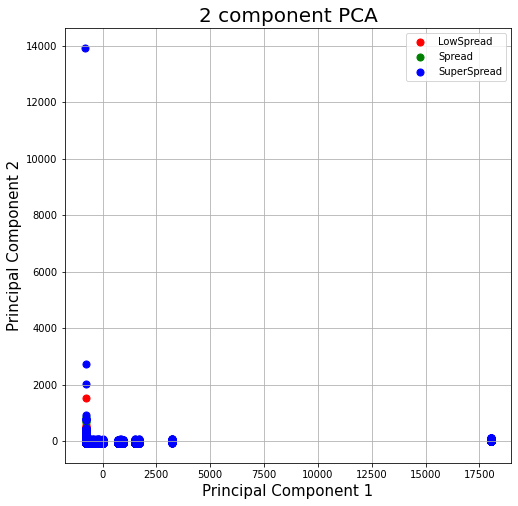

In [225]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['growth_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [226]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [227]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[4.62807144 1.74450167 1.43901778 0.80376685 0.66266089 0.55432144
 0.0800749  0.15493523 0.2412629  0.30559198 0.38750405] -> eigenvalues
[42.06684055 15.85664234 13.0799475   7.30583623  6.02325408  5.03850299
  0.72784051  1.4082833   2.19295833  2.77767732  3.52221684]  -> percent of variability explained


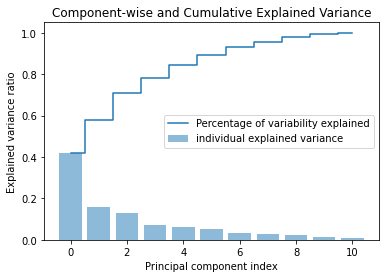

In [228]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,11), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,11), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [229]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[-0.39552344  0.07998141]
 [-0.36589215  0.0982739 ]
 [-0.21179328  0.09691008]
 [-0.38040442  0.09684882]
 [-0.34555164  0.0752878 ]
 [ 0.39298209 -0.08945641]
 [-0.34110588  0.04563855]
 [-0.20447183 -0.66076063]
 [-0.13684472 -0.70689869]
 [ 0.20837643 -0.09281765]
 [-0.16115271  0.06704395]]


In [230]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[-1.10119003  0.86367007]
 [-1.45014152 -0.04955502]
 [-2.66535829  0.23351623]
 ...
 [-2.43926886 -0.12895523]
 [-3.03006812 -0.51691563]
 [ 2.48520212 -0.06023871]]


In [231]:
np.unique(y_train)
X_train_pca

array([[-1.10119003,  0.86367007],
       [-1.45014152, -0.04955502],
       [-2.66535829,  0.23351623],
       ...,
       [-2.43926886, -0.12895523],
       [-3.03006812, -0.51691563],
       [ 2.48520212, -0.06023871]])

## Extra tree classifier

In [157]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

In [248]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['growth_code']

print(CA_labeled_data['growth_code'].unique())
print(pd.unique(CA_labeled_data[['growth_label', 'growth_code']].values.ravel()))

CA_labeled_data_growth0 = CA_labeled_data[(CA_labeled_data['growth_code'] == 0) ]
CA_labeled_data_growth1 = CA_labeled_data[(CA_labeled_data['growth_code'] == 1) ]
CA_labeled_data_growth2 = CA_labeled_data[(CA_labeled_data['growth_code'] == 2) | (CA_labeled_data['growth_code'] == 3) | (CA_labeled_data['growth_code'] == 4) ]
CA_labeled_data_growth3 = CA_labeled_data[CA_labeled_data['growth_code'] == 3]
CA_labeled_data_growth4 = CA_labeled_data[CA_labeled_data['growth_code'] == 4]

print(CA_labeled_data_growth0.shape)
print(CA_labeled_data_growth1.shape)
print(CA_labeled_data_growth2.shape)
print(CA_labeled_data_growth3.shape)
print(CA_labeled_data_growth4.shape)

[2 3 1 0 4]
['flat_growth' 2 'mild_decrement' 3 'drastic_growth' 1 'drastic_decrement'
 0 'mild_growth' 4]
(1011, 20)
(961, 20)
(7224, 20)
(570, 20)
(507, 20)


#### Label 0 : Drastic decrement

In [249]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(CA_labeled_data_growth0.shape)
X = CA_labeled_data_growth0[feature_labels]
y = CA_labeled_data_growth0[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for Drastic Growth ** 
(1011, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)

Features with ranking:

retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1


#### Label 1: Drastic Growth

In [250]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(CA_labeled_data_growth1.shape)
X = CA_labeled_data_growth1[feature_labels]
y = CA_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for Drastic Growth ** 
(961, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)

Features with ranking:

retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1


### Label 2: Flat growth

In [251]:

print("** Printing All county data for Flat Growth ** ")
print(CA_labeled_data_growth2.shape)
X = CA_labeled_data_growth2[feature_labels]
y = CA_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing All county data for Flat Growth ** 
(7224, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.08799969286582769)
('grocery and pharmacy', 0.08578920675412036)
('parks', 0.09038645269992812)
('transit stations', 0.0886086721744834)
('workplaces', 0.092460671650324)
('residential', 0.06070035200880949)
('driving', 0.1468812624542656)
('m50', 0.11658073556801789)
('m50_index', 0.09903926219659571)
('population_density', 0.0689609569405336)
('mask_rule_active', 0.06259273468709411)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.08799969286582769)
('grocery and pharmacy', 0.08578920675412036)
('parks', 0.09038645269992812)
('transit stations', 0.0886086721744834)
('workplaces', 0.092460671650324)
('residential', 0.06070035200880949)
('driving', 0.1468812624542656)
('m50', 0.11658073556801789)
('m50_index', 0.09903926219659571)
('population_density', 0.0689609569405336)
('mask_rule_active', 0.06259273468709411)

Features with ranking:

retail and recreation 1
grocery and pharmacy 4
parks 5
transit stations 6
workplaces 2
residential 7
driving 1
m50 1
m50_index 3
population_density 8
mask_rule_active 9


### Label 3: Mild decrement 

In [235]:

print("** Printing San Bernardino county data for Mild decrement ** ")
print(CA_labeled_data_growth3.shape)
X = CA_labeled_data_growth3[feature_labels]
y = CA_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for Mild decrement ** 
(570, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)

Features with ranking:

retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1


### Label 4: mild increment

In [236]:

print("** Printing San Bernardino county data for mild increment ** ")
print(CA_labeled_data_growth4.shape)
X = CA_labeled_data_growth4[feature_labels]
y = CA_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for mild increment ** 
(507, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('retail and recreation', 0.0)
('grocery and pharmacy', 0.0)
('parks', 0.0)
('transit stations', 0.0)
('workplaces', 0.0)
('residential', 0.0)
('driving', 0.0)
('m50', 0.0)
('m50_index', 0.0)
('population_density', 0.0)
('mask_rule_active', 0.0)

Features with ranking:

retail and recreation 9
grocery and pharmacy 8
parks 7
transit stations 6
workplaces 5
residential 4
driving 3
m50 2
m50_index 1
population_density 1
mask_rule_active 1


# 2.Load data - Maryland Inertia Data

In [164]:
CA_inertia_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_sd_inertia_labeledData_Oct11.csv',low_memory=False)
print(CA_inertia_labeled_data.shape)

(12296, 54)


In [165]:
CA_inertia_labeled_data.describe()

,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases
count,12296.0000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.0000,12296.0,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,1.229600e+04,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,1.229600e+04,1.229600e+04,0.0,0.0,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000
mean,6058.0000,2531.505612,59.213484,53.047088,0.960475,0.301887,6058.0000,6.0,34.862476,26.085638,3.032430,25.046755,2.983913,39.160662,0.387563,2.644869,53.130042,6.820180e+05,-6.379148,2.899655,23.724138,64378.551724,2.968966,30.324138,50.583621,402.603448,212.637931,133.896552,2.050000e+00,2.200000e-01,NaN,NaN,39.741379,8.829906,52.830189,6.745283,18.265566,22.638208,0.397594,0.890708,0.058497,1.895142,11.376464,56.306571,6.795755,59.918019,12.413632,488.528302,430.063110
std,33.4827,12806.203050,341.107832,237.604060,5.119259,0.459095,33.4827,0.0,14.622690,6.825513,0.467951,12.090923,6.958225,16.144773,0.154824,0.409967,237.520829,1.462452e+06,14.091174,5.490197,6.794780,18609.544005,2.889408,17.897292,2.471542,766.018814,495.175970,42.718402,4.489924e-13,3.064340e-14,NaN,NaN,34.611831,12.179130,42.906965,5.510029,9.491439,9.884724,0.490272,0.654789,0.131169,2.226533,21.634425,1.853671,5.481033,76.431354,9.054440,374.031220,1170.238201
min,6001.0000,0.000000,0.000000,-621.000000,-16.000000,0.000000,6001.0000,6.0,0.000000,0.000000,0.280000,2.100000,0.000000,0.100000,0.000000,0.250000,0.000000,1.101000e+03,-100.000000,0.000000,14.000000,38497.000000,0.200000,7.200000,48.180000,2.000000,1.000000,66.000000,2.050000e+00,2.200000e-01,NaN,NaN,1.000000,0.000000,0.000000,0.900000,3.900000,5.700000,-0.600000,0.000000,0.000000,0.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6029.0000,0.000000,0.000000,0.000000,0.000000,0.000000,6029.0000,6.0,24.000000,21.000000,2.760000,15.800000,0.100000,30.000000,0.270000,2.410000,0.000000,4.560200e+04,-14.300000,0.540000,18.000000,50905.000000,1.000000,14.500000,49.480000,23.000000,14.000000,102.000000,2.050000e+00,2.200000e-01,NaN,NaN,9.000000,0.187500,14.000000,3.900000,5.675000,19.525000,0.200000,0.077500,0.000000,0.010000,0.000000,54.092556,5.300000,0.030000,0.207500,17.250000,1.000000
50%,6058.0000,38.000000,1.000000,0.000000,0.000000,0.000000,6058.0000,6.0,33.000000,25.000000,3.050000,23.400000,0.300000,37.500000,0.380000,2.670000,0.000000,1.862525e+05,-5.600000,1.165000,21.000000,59157.500000,1.850000,25.600000,49.855000,107.000000,33.000000,132.000000,2.050000e+00,2.200000e-01,NaN,NaN,21.000000,3.440000,42.000000,6.200000,23.400000,26.700000,0.300000,0.870000,0.008500,1.080000,1.000000,56.782021,6.100000,20.880000,15.155000,629.500000,43.000000
75%,6087.0000,703.000000,12.000000,14.000000,0.000000,1.000000,6087.

## Preprocessing data 

* drop na
* convert categorical code

In [166]:
# CA_inertia_labeled_data['label_code'] = CA_inertia_labeled_data['label'].astype('category').cat.codes

# CA_inertia_labeled_data.head(2)

In [167]:
CA_inertia_labeled_data = CA_inertia_labeled_data.fillna(0)

In [168]:
# CA_inertia_labeled_data[pd.isna(CA_inertia_labeled_data['label'])]

In [169]:
# CA_inertia_labeled_data['label_code'].unique()

In [170]:
CA_inertia_labeled_data['growth_code'] = CA_inertia_labeled_data['growth_label'].astype('category').cat.codes
CA_inertia_labeled_data.head()

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label,growth_code
0,2020-01-22,California,6001,0,0,0,0,0,6001,Alameda County,6,18,20,3.29,29.4,0.3,35.9,0.55,2.74,0,1666753,-2.9,2020-01-22,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
1,2020-01-23,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.36,29.6,0.3,35.4,0.56,2.80,0,1666753,-0.8,2020-01-23,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
2,2020-01-24,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.48,29.0,0.3,39.1,0.53,2.94,0,1666753,4.1,2020-01-24,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
3,2020-01-25,California,6001,0,0,0,0,0,6001,Alameda County,6,30,24,3.16,26.6,0.3,36.3,0.27,2.88,0,1666753,2.0,2020-01-25,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
4,2020-01-26,California,6001,0,0,0,0,0,6001,Alameda County,6,41,28,2.80,25.6,0.4,35.4,0.24,2.56,0,1666753,-9.3,2020-01-26,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.1,3.9,5.7,0.3,0.0,0.0,0.0,2,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0


In [171]:
CA_inertia_labeled_data['growth_code'].unique()

array([0, 3, 2, 1], dtype=int8)

In [172]:
CA_inertia_labeled_data.dtypes

Date                                           object
Province_State                                 object
FIPS                                            int64
Confirmed                                       int64
Deaths                                          int64
New cases                                       int64
New deaths                                      int64
mask_rule_active                                int64
CTFIPS                                          int64
CTNAME                                         object
STFIPS                                          int64
Social distancing index                         int64
% staying home                                  int64
Trips/person                                  float64
% out-of-county trips                         float64
% out-of-state trips                          float64
Miles/person                                  float64
Work trips/person                             float64
Non-work trips/person       

In [173]:
CA_inertia_labeled_data.columns

Index(['Date', 'Province_State', 'FIPS', 'Confirmed', 'Deaths', 'New cases',
       'New deaths', 'mask_rule_active', 'CTFIPS', 'CTNAME', 'STFIPS',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people',
       '# contact tracing workers/1000 people rank',
       '% people older than 60 rank', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation

In [174]:
X.shape

(507, 11)

In [202]:
inertia_feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

inertia_target_column = ['growth_code']

X = CA_inertia_labeled_data[inertia_feature_labels]
y = CA_inertia_labeled_data[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Train Random Forest classifier

In [176]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('mask_rule_active', 0.013145935258524753)
('Social distancing index', 0.027443787338695954)
('% staying home', 0.022815673872416273)
('Trips/person', 0.029471049223920187)
('% out-of-county trips', 0.040753502954102405)
('% out-of-state trips', 0.03059064020487365)
('Miles/person', 0.03425618464361533)
('Work trips/person', 0.037875713971096264)
('Non-work trips/person', 0.02872039092735927)
('% change in consumption', 0.029956633816725763)
('Transit mode share', 0.04848525399363492)
('% people older than 60', 0.034733273919375515)
('Median income', 0.07643615975724334)
('% African Americans', 0.026170452530892823)
('% Hispanic Americans', 0.04083158112443873)
('% Male', 0.032446242993345885)
('Population density', 0.07036737277885578)
('Employment density', 0.06384737257537026)
('# hot spots/1000 people', 0.029025035685968627)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.034124128405

In [177]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
print(X_train.shape)
# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(7377, 33)
('mask_rule_active', 0.015473067892541426)
('Social distancing index', 0.028041252760490947)
('% staying home', 0.022774533546743657)
('Trips/person', 0.02935581958008254)
('% out-of-county trips', 0.03829030128470095)
('% out-of-state trips', 0.03017387374318898)
('Miles/person', 0.034139052921918066)
('Work trips/person', 0.035501006060693924)
('Non-work trips/person', 0.028497808630358525)
('% change in consumption', 0.029953476937965632)
('Transit mode share', 0.044973435901114384)
('% people older than 60', 0.0400581738790694)
('Median income', 0.06485191785545075)
('% African Americans', 0.023543550277372476)
('% Hispanic Americans', 0.03581139902086497)
('% Male', 0.03538419116217329)
('Population density', 0.07358002034019798)
('Employment density', 0.0551323091850895)
('# hot spots/1000 people', 0.027109653310871538)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0396

In [178]:
X_train.shape

(7377, 33)

## PCA Computation

In [179]:
print(len(feature_labels))

33


In [203]:
# split into training and testing datasets


X = CA_inertia_labeled_data[inertia_feature_labels].values
y = CA_inertia_labeled_data[inertia_target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=0)
print(X_train.shape)
print(y_train.shape)

(8607, 33)
(8607, 1)


In [181]:
# standardize the features
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [182]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [183]:
principalDf

,principal component 1,principal component 2
0,28236.537830,1059.912122
1,28236.536739,1059.901668
2,28236.535183,1059.887011
3,28236.540377,1059.948580
4,28236.545556,1060.000074
...,...,...
12291,-11759.502772,-8.952713
12292,-11759.502642,-8.948701
12293,-11759.507082,-8.995375
12294,-11759.506893,-8.969652


In [184]:
finalDf = pd.concat([principalDf, CA_inertia_labeled_data[inertia_target_column]],axis=1 )
finalDf

,principal component 1,principal component 2,growth_code
0,28236.537830,1059.912122,0
1,28236.536739,1059.901668,0
2,28236.535183,1059.887011,0
3,28236.540377,1059.948580,0
4,28236.545556,1060.000074,0
...,...,...,...
12291,-11759.502772,-8.952713,2
12292,-11759.502642,-8.948701,0
12293,-11759.507082,-8.995375,1
12294,-11759.506893,-8.969652,1


0
1
2


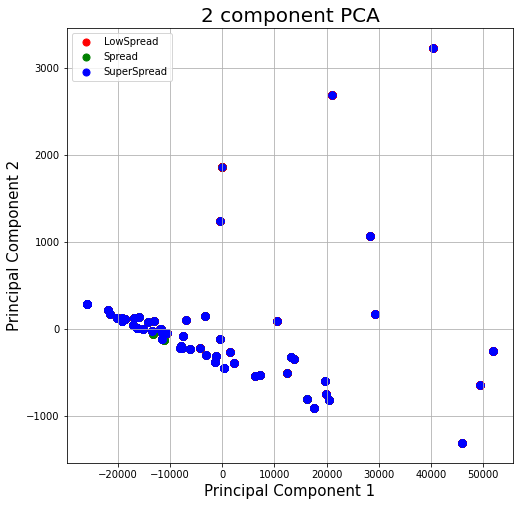

In [185]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LowSpread', 'Spread', 'SuperSpread']
targets2 = np.unique(y_train)
colors = ['r', 'g', 'b']
for target, color in zip(targets2,colors):
    print(target)
    indicesToKeep = finalDf['growth_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [186]:
#obtain the eigenpairs of the Wine covariance matrix:
#data_cov = np.dot(np.transpose(data.values),data.values)
#data_cov
X_train_cov = np.cov(X_train_std.T)
w, v = np.linalg.eig(X_train_cov)

In [187]:
#The percent of variability contained within each component
w_percent = (w/np.sum(w))*100                 
print(w, '-> eigenvalues')
print(w_percent, ' -> percent of variability explained')

[6.77028848e+00 5.69126696e+00 4.18239883e+00 3.07585512e+00
 1.67024958e+00 1.52577696e+00 1.17470945e+00 1.04257363e+00
 7.14805744e-01 6.37614928e-01 5.87190045e-01 5.19639095e-01
 4.39363309e-01 4.07083936e-01 3.46519529e-01 2.82309291e-01
 1.96078400e-01 1.92497257e-01 1.27063760e-01 1.04688278e-01
 8.33390489e-02 8.00887728e-02 5.50079720e-02 3.32457450e-02
 2.37677967e-02 3.57446177e-03 6.24001356e-05 1.70854556e-02
 8.69859828e-03 1.06431053e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00] -> eigenvalues
[2.25650063e+01 1.89686857e+01 1.39397097e+01 1.02516592e+01
 5.56685175e+00 5.08533229e+00 3.91524321e+00 3.47484167e+00
 2.38240898e+00 2.12513616e+00 1.95707274e+00 1.73192907e+00
 1.46437421e+00 1.35678880e+00 1.15493090e+00 9.40921635e-01
 6.53518729e-01 6.41582972e-01 4.23496657e-01 3.48920382e-01
 2.77764554e-01 2.66931559e-01 1.83338603e-01 1.10806274e-01
 7.92167842e-02 1.19134883e-02 2.07976286e-04 5.69449018e-02
 2.89919588e-02 3.54728958e-02 0.00000000e+00 0.00000

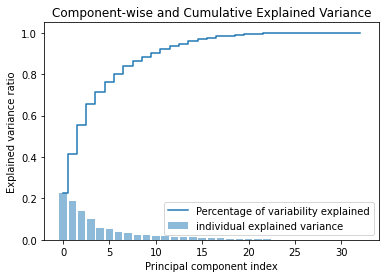

In [188]:
# calculate cumulative sum of explained variances
tot = sum(w)
var_exp = [(i / tot) for i in sorted(w, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.title("Component-wise and Cumulative Explained Variance")
plt.bar(range(0,33), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,33), cum_var_exp, where='mid',
         label='Percentage of variability explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [189]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(w[i]), v[:, i]) for i in range(len(w))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w2 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W2:\n', w2)

Matrix W2:
 [[ 0.20821804 -0.24806418]
 [ 0.25008831  0.27225632]
 [ 0.24427327  0.26870783]
 [-0.22272953 -0.25633126]
 [ 0.02746156 -0.06105522]
 [ 0.01951422 -0.01782175]
 [-0.05235186 -0.26684766]
 [-0.22694036 -0.02491195]
 [-0.16813353 -0.28327607]
 [-0.16044687 -0.27739742]
 [ 0.09241578  0.17080242]
 [-0.00101008 -0.04490956]
 [ 0.08603629  0.16545714]
 [ 0.0233578   0.0732212 ]
 [-0.03063899 -0.02610159]
 [-0.01708912 -0.0393162 ]
 [ 0.09044404  0.18290147]
 [ 0.09636228  0.18770811]
 [ 0.06425295  0.07789793]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.00396731 -0.05069087]
 [ 0.23322009 -0.26897206]
 [ 0.18769773  0.1489386 ]
 [ 0.29513666 -0.1671551 ]
 [ 0.32300857 -0.02502694]
 [-0.01250651 -0.10800998]
 [ 0.29433964 -0.19465842]
 [ 0.1237698   0.14136713]
 [ 0.23975412 -0.27867049]
 [ 0.31398784 -0.1892198 ]
 [ 0.31122243 -0.20924403]]


In [190]:
X_train_pca = X_train_std.dot(w2)
print(X_train_pca)

[[ 0.76627035  4.45684414]
 [ 1.77941597  4.10855415]
 [ 1.51005547 -2.2045616 ]
 ...
 [ 0.83288028 -2.6928585 ]
 [-0.27139501 -1.74207874]
 [-1.63531039  2.66576593]]


In [191]:
np.unique(y_train)
X_train_pca

array([[ 0.76627035,  4.45684414],
       [ 1.77941597,  4.10855415],
       [ 1.51005547, -2.2045616 ],
       ...,
       [ 0.83288028, -2.6928585 ],
       [-0.27139501, -1.74207874],
       [-1.63531039,  2.66576593]])

## Extra tree classifier

In [192]:
inertia_feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

inertia_target_column = ['growth_code']

In [193]:
print(CA_inertia_labeled_data['growth_code'].unique())
print(pd.unique(CA_inertia_labeled_data[['growth_label', 'growth_code']].values.ravel()))

CA_inertia_labeled_data_growth0 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 0]
CA_inertia_labeled_data_growth1 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 1]
CA_inertia_labeled_data_growth2 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 2]
CA_inertia_labeled_data_growth3 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 3]
CA_inertia_labeled_data_growth4 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 4]

print(CA_inertia_labeled_data_growth0.shape)
print(CA_inertia_labeled_data_growth1.shape)
print(CA_inertia_labeled_data_growth2.shape)
print(CA_inertia_labeled_data_growth3.shape)
print(CA_inertia_labeled_data_growth4.shape)

[0 3 2 1]
['drastic_decrement' 0 'mild_decrement' 3 'flat_growth' 2 'drastic_growth'
 1]
(4801, 55)
(457, 55)
(1367, 55)
(5671, 55)
(0, 55)


### Label 0: Drastic decrement

In [194]:

print("** Printing San Bernardino county data for mild increment ** ")
print(CA_inertia_labeled_data_growth0.shape)
X = CA_inertia_labeled_data_growth0[inertia_feature_labels]
y = CA_inertia_labeled_data_growth0[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for mild increment ** 
(4801, 55)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)

Featu

### Label 1: Drastic growth

In [195]:

print("** Printing All county data for mild increment ** ")
print(CA_inertia_labeled_data_growth1.shape)
X = CA_inertia_labeled_data_growth1[inertia_feature_labels]
y = CA_inertia_labeled_data_growth1[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing All county data for mild increment ** 
(457, 55)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)

Featu

### Label 2: Flat growth

In [196]:

print("** Printing San Bernardino county data for mild increment ** ")
print(CA_inertia_labeled_data_growth2.shape)
X = CA_inertia_labeled_data_growth2[inertia_feature_labels]
y = CA_inertia_labeled_data_growth2[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for mild increment ** 
(1367, 55)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)

Featu

### Label 3: mild decrement

In [199]:

print("** Printing San Bernardino county data for mild increment ** ")
print(CA_inertia_labeled_data_growth3.shape)
X = CA_inertia_labeled_data_growth3[inertia_feature_labels]
y = CA_inertia_labeled_data_growth3[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


** Printing San Bernardino county data for mild increment ** 
(5671, 55)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('mask_rule_active', 0.0)
('Social distancing index', 0.0)
('% staying home', 0.0)
('Trips/person', 0.0)
('% out-of-county trips', 0.0)
('% out-of-state trips', 0.0)
('Miles/person', 0.0)
('Work trips/person', 0.0)
('Non-work trips/person', 0.0)
('% change in consumption', 0.0)
('Transit mode share', 0.0)
('% people older than 60', 0.0)
('Median income', 0.0)
('% African Americans', 0.0)
('% Hispanic Americans', 0.0)
('% Male', 0.0)
('Population density', 0.0)
('Employment density', 0.0)
('# hot spots/1000 people', 0.0)
('Hospital beds/1000 people', 0.0)
('ICUs/1000 people', 0.0)
('# contact tracing workers/1000 people rank', 0.0)
('% people older than 60 rank', 0.0)
('COVID exposure/1000 people', 0.0)
('Unemployment claims/1000 people', 0.0)
('Unemployment rate', 0.0)
('% working from home', 0.0)
('Cumulative inflation rate', 0.0)
('% hospital bed utilization', 0.0)
('Testing capacity', 0.0)
('Tests done/1000 people', 0.0)
('% ICU utilization', 0.0)
('Ventilator shortage', 0.0)

Featu

### Label 4: mild increment << NO DATA >>

# RUN BEFORE this cell only 

In [ ]:
print("Run before this cell ")

# UNUSED

# Selecting three counties in CA
* Los Angeles
* Riverside
* San Bernardino

### Filtered data for county - From Combined Dataset

In [119]:
la_county_data = CA_labeled_data[CA_labeled_data['County Name'] == 'Los Angeles County']
Westchester_county_data = CA_labeled_data[CA_labeled_data['County Name'] == 'Riverside County']
Suffolk_county_data = CA_labeled_data[CA_labeled_data['County Name'] == 'San Bernardino County']

print(' Nassau county data ',la_county_data.shape)
print(' Westchester county data ',Westchester_county_data.shape)
print(' Suffolk county data ',Suffolk_county_data.shape)

 Nassau county data  (172, 20)
 Westchester county data  (172, 20)
 Suffolk county data  (172, 20)


# Note about growth label

growth_code| label
----|----
 0 | drastic decrement
 1 | drastic growth
 2 | flat
 3 | mild decrement
 4 | mild increment





## LA County

In [120]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['growth_code']

print(la_county_data['growth_code'].unique())

Nassau_county_data_growth0 = Nassau_county_data[Nassau_county_data['growth_code'] == 0]
Nassau_county_data_growth1 = Nassau_county_data[Nassau_county_data['growth_code'] == 1]
Nassau_county_data_growth2 = Nassau_county_data[Nassau_county_data['growth_code'] == 2]
Nassau_county_data_growth3 = Nassau_county_data[Nassau_county_data['growth_code'] == 3]
Nassau_county_data_growth4 = Nassau_county_data[Nassau_county_data['growth_code'] == 4]

print(Nassau_county_data_growth0.shape)
print(Nassau_county_data_growth1.shape)
print(Nassau_county_data_growth2.shape)
print(Nassau_county_data_growth3.shape)
print(Nassau_county_data_growth4.shape)

[2 3 1 0 4]


NameError: ignored

In [ ]:
CA_inertia_labeled_data.head()

## 1.Drastic Decrement

In [ ]:
from sklearn.ensemble import RandomForestRegressor
print("** Printing Los Angeles county data for drastic decrement ** ")

X = CA_inertia_labeled_data_growth0[iner]
y = CA_inertia_labeled_data_growth0[target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy',min_samples_leaf=5, n_jobs=-1)


# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)

#print(sorted(zip(clf.feature_importances_, feature_labels), reverse=True))

## 2.Drastic Growth

In [ ]:
print("** Printing Los Angeles county data for drastic growth ** ")

X = la_county_data_growth1[feature_labels]
y = la_county_data_growth1[target_column]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


## 3.Flat Growth

In [ ]:
print("** Printing Los Angeles county data for flat growth ** ")

X = la_county_data_growth2[feature_labels]
y = la_county_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


## 4.Mild Decrement

In [ ]:
print("** Printing Los Angeles county data for mild decrement ** ")

X = la_county_data_growth3[feature_labels]
y = la_county_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


## 5.Mild Increment

In [ ]:
print("** Printing Los Angeles county data for mild increment ** ")

X = la_county_data_growth4[feature_labels]
y = la_county_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


## Correlation map

In [ ]:


# Correlation

corr = la_county_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

# Feature Importance: Using ExtraTreesClassifier

## 1.CA Combined Data

In [ ]:
pd.unique(CA_labeled_data[['growth_label', 'growth_code']].values.ravel())

In [ ]:
feature_labels = ['retail and recreation','grocery and pharmacy','parks','transit stations','workplaces','residential','driving','m50','m50_index',
               'population_density','mask_rule_active']

target_column = ['growth_code']

In [ ]:
CA_labeled_data_growth0 = CA_labeled_data[CA_labeled_data['growth_code'] == 0]
CA_labeled_data_growth1 = CA_labeled_data[CA_labeled_data['growth_code'] == 1]
CA_labeled_data_growth2 = CA_labeled_data[CA_labeled_data['growth_code'] == 2]
CA_labeled_data_growth3 = CA_labeled_data[CA_labeled_data['growth_code'] == 3]
CA_labeled_data_growth4 = CA_labeled_data[CA_labeled_data['growth_code'] == 4]

print(CA_labeled_data_growth0.shape)
print(CA_labeled_data_growth1.shape)
print(CA_labeled_data_growth2.shape)
print(CA_labeled_data_growth3.shape)
print(CA_labeled_data_growth4.shape)

### 1.1 Label 0 : Drastic Decrement

In [ ]:

print("** Printing CA all county data for Drastic Decrement ** ")
print(CA_labeled_data_growth0.shape)
X = CA_labeled_data_growth0[feature_labels]
y = CA_labeled_data_growth0[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 1.2 Label 1 : Drastic Growth

In [ ]:

print("** Printing CA all county data for Drastic Growth ** ")
print(CA_labeled_data_growth1.shape)
X = CA_labeled_data_growth1[feature_labels]
y = CA_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA all county data for Drastic Growth ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 1.3 Label 2 : Flat Growth

In [ ]:

print("** Printing CA all county data for Flat Growth ** ")
print(CA_labeled_data_growth2.shape)
X = CA_labeled_data_growth2[feature_labels]
y = CA_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA all county data for Flat Growth ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 1.4 Label 3 : Mild Decrement

In [ ]:

print("** Printing CA all county data for Mild Decrement ** ")
print(CA_labeled_data_growth3.shape)
X = CA_labeled_data_growth3[feature_labels]
y = CA_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA all county data for Mild Decrement ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 1.5 Label 4 : Mild Increment

In [ ]:
print("** Printing CA all county data for Mild Increment ** ")
print(CA_labeled_data_growth4.shape)
X = CA_labeled_data_growth4[feature_labels]
y = CA_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA all county data for Mild Increment ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])


for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## 2.CA Maryland Inertia Data

In [ ]:
pd.unique(CA_inertia_labeled_data[['growth_label', 'growth_code']].values.ravel())

In [ ]:
CA_inertia_labeled_data_growth0 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 0]
CA_inertia_labeled_data_growth1 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 1]
CA_inertia_labeled_data_growth2 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 2]
CA_inertia_labeled_data_growth3 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 3]
CA_inertia_labeled_data_growth4 = CA_inertia_labeled_data[CA_inertia_labeled_data['growth_code'] == 4]

print(CA_inertia_labeled_data_growth0.shape)
print(CA_inertia_labeled_data_growth1.shape)
print(CA_inertia_labeled_data_growth2.shape)
print(CA_inertia_labeled_data_growth3.shape)
print(CA_inertia_labeled_data_growth4.shape)

In [ ]:
inertia_feature_labels = [ 'mask_rule_active',
         'Social distancing index',
       '% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person',  'Population',
       '% change in consumption', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people',
       '# contact tracing workers/1000 people rank',
       '% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate',
       '% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage']

inertia_target_column = ['growth_code']

### 2.1 Label 0 : Drastic Decrement

In [ ]:

print("** Printing CA inertia all county data for Drastic Decrement ** ")
print(CA_inertia_labeled_data_growth0.shape)
X = CA_inertia_labeled_data_growth0[inertia_feature_labels]
y = CA_inertia_labeled_data_growth0[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 2.2 Label 1 : Drastic Growth

In [ ]:

print("** Printing CA_inertia all county data for Drastic Growth ** ")
print(CA_inertia_labeled_data_growth1.shape)
X = CA_inertia_labeled_data_growth1[inertia_feature_labels]
y = CA_inertia_labeled_data_growth1[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA_inertia all county data for Drastic Growth ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 2.3 Label 2 : Flat Growth

In [ ]:

print("** Printing CA_inertia all county data for Flat Growth ** ")
print(CA_inertia_labeled_data_growth2.shape)
X = CA_inertia_labeled_data_growth2[inertia_feature_labels]
y = CA_inertia_labeled_data_growth2[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA_inertia all county data for Flat Growth ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print(rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 2.4 Label 3 : Mild Decrement

In [ ]:

print("** Printing CA_inertia all county data for Mild Decrement ** ")
print(CA_inertia_labeled_data_growth3.shape)
X = CA_inertia_labeled_data_growth3[inertia_feature_labels]
y = CA_inertia_labeled_data_growth3[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA_inertia all county data for Mild Decrement ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])


for index in range(len(rfe.ranking_)):
  print(rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


### 2.5 Label 4 : Mild Increment 

In [ ]:
print("** Printing CA_inertia all county data for Mild Increment ** ")
print(CA_inertia_labeled_data_growth4.shape)
X = CA_inertia_labeled_data_growth4[inertia_feature_labels]
y = CA_inertia_labeled_data_growth4[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)
print("\n*****************************************")
print("** Printing CA_inertia all county data for Mild Increment ** ")
print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select
for index in range(len(rfe.ranking_)):
  print(rfe.ranking_[index])



# Feature Importance for : Using SanBernardino 



In [ ]:
sanBernardio_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_labeledData_SanBernardino_Oct11.csv',low_memory=False)
print(sanBernardio_labeled_data.shape)

## Preprocessing

In [ ]:
sanBernardio_labeled_data['growth_code'] = sanBernardio_labeled_data['growth_label'].astype('category').cat.codes

sanBernardio_labeled_data.head(2)

In [ ]:
pd.unique(sanBernardio_labeled_data[['growth_label', 'growth_code']].values.ravel())

In [ ]:
sanBernardio_labeled_data_growth0 = sanBernardio_labeled_data[sanBernardio_labeled_data['growth_code'] == 0]
sanBernardio_labeled_data_growth1 = sanBernardio_labeled_data[sanBernardio_labeled_data['growth_code'] == 1]
sanBernardio_labeled_data_growth2 = sanBernardio_labeled_data[sanBernardio_labeled_data['growth_code'] == 2]
sanBernardio_labeled_data_growth3 = sanBernardio_labeled_data[sanBernardio_labeled_data['growth_code'] == 3]
sanBernardio_labeled_data_growth4 = sanBernardio_labeled_data[sanBernardio_labeled_data['growth_code'] == 4]

print(sanBernardio_labeled_data_growth0.shape)
print(sanBernardio_labeled_data_growth1.shape)
print(sanBernardio_labeled_data_growth2.shape)
print(sanBernardio_labeled_data_growth3.shape)
print(sanBernardio_labeled_data_growth4.shape)

## Label 0: Drastic decrement San Bernardio county can't run due to low data

## Label 1: Drastic growth for San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth1.shape)
X = sanBernardio_labeled_data_growth1[feature_labels]
y = sanBernardio_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 2: Flat growth San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth2.shape)
X = sanBernardio_labeled_data_growth2[feature_labels]
y = sanBernardio_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 3: mild decrement San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth3.shape)
X = sanBernardio_labeled_data_growth3[feature_labels]
y = sanBernardio_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 4: Mild increment San bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth4.shape)
X = sanBernardio_labeled_data_growth4[feature_labels]
y = sanBernardio_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


# Feature Importance using San Diego

In [ ]:
sanDiego_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_labeledData_SanDiego_Oct11.csv',low_memory=False)
print(sanDiego_labeled_data.shape)

## Preprocessing

In [ ]:
sanDiego_labeled_data['growth_code'] = sanDiego_labeled_data['growth_label'].astype('category').cat.codes

sanDiego_labeled_data.head(2)

In [ ]:
pd.unique(sanDiego_labeled_data[['growth_label', 'growth_code']].values.ravel())

In [ ]:
sanDiego_labeled_data_growth0 = sanDiego_labeled_data[sanDiego_labeled_data['growth_code'] == 0]
sanDiego_labeled_data_growth1 = sanDiego_labeled_data[sanDiego_labeled_data['growth_code'] == 1]
sanDiego_labeled_data_growth2 = sanDiego_labeled_data[sanDiego_labeled_data['growth_code'] == 2]
sanDiego_labeled_data_growth3 = sanDiego_labeled_data[sanDiego_labeled_data['growth_code'] == 3]
sanDiego_labeled_data_growth4 = sanDiego_labeled_data[sanDiego_labeled_data['growth_code'] == 4]

print(sanDiego_labeled_data_growth0.shape)
print(sanDiego_labeled_data_growth1.shape)
print(sanDiego_labeled_data_growth2.shape)
print(sanDiego_labeled_data_growth3.shape)
print(sanDiego_labeled_data_growth4.shape)

## Label 0: Drastic decrement San Diego county

In [ ]:

print("** Printing San Diego county data for Drastic decrement ** ")
print(sanDiego_labeled_data_growth0.shape)
X = sanDiego_labeled_data_growth0[feature_labels]
y = sanDiego_labeled_data_growth0[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 1: Drastic growth San Diego county

In [ ]:

print("** Printing San Diego county data for Drastic growth ** ")
print(sanDiego_labeled_data_growth1.shape)
X = sanDiego_labeled_data_growth1[feature_labels]
y = sanDiego_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 2: Flat growth San Diego county

In [ ]:

print("** Printing San Diego county data for flat growth ** ")
print(sanDiego_labeled_data_growth2.shape)
X = sanDiego_labeled_data_growth2[feature_labels]
y = sanDiego_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 3: Mild decrement San Diego county

In [ ]:

print("** Printing San Diego county data for mild decrement ** ")
print(sanDiego_labeled_data_growth3.shape)
X = sanDiego_labeled_data_growth3[feature_labels]
y = sanDiego_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 4: Mild increment San Diego county

In [ ]:

print("** Printing San Diego county data for mild increment ** ")
print(sanDiego_labeled_data_growth4.shape)
X = sanDiego_labeled_data_growth4[feature_labels]
y = sanDiego_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


# Feature importance using San Bernardio for inertia data

In [ ]:
sanBernardio_labeled_data2 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_sd_inertia_labeledData_SanBernardino_Oct11.csv',low_memory=False)
print(sanBernardio_labeled_data2.shape)

## Preprocessing

In [ ]:
sanBernardio_labeled_data2['growth_code'] = sanBernardio_labeled_data2['growth_label'].astype('category').cat.codes

sanBernardio_labeled_data2.head(2)

In [ ]:

sanBernardio_labeled_data2 = sanBernardio_labeled_data2.fillna(0)
sanBernardio_labeled_data_growth0 = sanBernardio_labeled_data2[sanBernardio_labeled_data2['growth_code'] == 0]
sanBernardio_labeled_data_growth1 = sanBernardio_labeled_data2[sanBernardio_labeled_data2['growth_code'] == 1]
sanBernardio_labeled_data_growth2 = sanBernardio_labeled_data2[sanBernardio_labeled_data2['growth_code'] == 2]
sanBernardio_labeled_data_growth3 = sanBernardio_labeled_data2[sanBernardio_labeled_data2['growth_code'] == 3]
sanBernardio_labeled_data_growth4 = sanBernardio_labeled_data2[sanBernardio_labeled_data2['growth_code'] == 4]

print(sanBernardio_labeled_data_growth0.shape)
print(sanBernardio_labeled_data_growth1.shape)
print(sanBernardio_labeled_data_growth2.shape)
print(sanBernardio_labeled_data_growth3.shape)
print(sanBernardio_labeled_data_growth4.shape)

In [ ]:
feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

target_column = ['growth_code']

## Label 0: Drastic decrement San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth0.shape)
X = sanBernardio_labeled_data_growth0[feature_labels]
y = sanBernardio_labeled_data_growth0[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 1: Drastic growth San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth1.shape)
X = sanBernardio_labeled_data_growth1[feature_labels]
y = sanBernardio_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 2: Flat growth San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth2.shape)
X = sanBernardio_labeled_data_growth2[feature_labels]
y = sanBernardio_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 3: Mild decrement San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth3.shape)
X = sanBernardio_labeled_data_growth3[feature_labels]
y = sanBernardio_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

for index in range(len(rfe.ranking_)):
  print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 4: Mild increment San Bernardio county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanBernardio_labeled_data_growth4.shape)
X = sanBernardio_labeled_data_growth4[feature_labels]
y = sanBernardio_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


# Feature importance using San Diego for inertia data

In [ ]:
sanDiego_labeled_data2 = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/CA/CA_sd_inertia_labeledData_sandiego_Oct11.csv',low_memory=False)
print(sanDiego_labeled_data2.shape)

## preprocessing

In [ ]:
sanDiego_labeled_data2['growth_code'] = sanDiego_labeled_data2['growth_label'].astype('category').cat.codes

sanDiego_labeled_data2.head(2)

In [ ]:
sanDiego_labeled_data2 = sanDiego_labeled_data2.fillna(0)

In [ ]:
sanDiego_labeled_data_growth0 = sanDiego_labeled_data2[sanDiego_labeled_data2['growth_code'] == 0]
sanDiego_labeled_data_growth1 = sanDiego_labeled_data2[sanDiego_labeled_data2['growth_code'] == 1]
sanDiego_labeled_data_growth2 = sanDiego_labeled_data2[sanDiego_labeled_data2['growth_code'] == 2]
sanDiego_labeled_data_growth3 = sanDiego_labeled_data2[sanDiego_labeled_data2['growth_code'] == 3]
sanDiego_labeled_data_growth4 = sanDiego_labeled_data2[sanDiego_labeled_data2['growth_code'] == 4]

print(sanDiego_labeled_data_growth0.shape)
print(sanDiego_labeled_data_growth1.shape)
print(sanDiego_labeled_data_growth2.shape)
print(sanDiego_labeled_data_growth3.shape)
print(sanDiego_labeled_data_growth4.shape)

## Label 0: Drastic decrement San Diego county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanDiego_labeled_data_growth0.shape)
X = sanDiego_labeled_data_growth0[feature_labels]
y = sanDiego_labeled_data_growth0[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 1: Drastic growth San Diego county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanDiego_labeled_data_growth1.shape)
X = sanDiego_labeled_data_growth1[feature_labels]
y = sanDiego_labeled_data_growth1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 2: Flat growth San Diego county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanDiego_labeled_data_growth2.shape)
X = sanDiego_labeled_data_growth2[feature_labels]
y = sanDiego_labeled_data_growth2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 3: Mild decrement San Diego county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanDiego_labeled_data_growth3.shape)
X = sanDiego_labeled_data_growth3[feature_labels]
y = sanDiego_labeled_data_growth3[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


## Label 4: Mild increment San Diego county

In [ ]:

print("** Printing San Bernardino county data for Drastic Growth ** ")
print(sanDiego_labeled_data_growth4.shape)
X = sanDiego_labeled_data_growth4[feature_labels]
y = sanDiego_labeled_data_growth4[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='entropy', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select
